Script to show the use of matplotlib in my modelling work
(Anne Kruijt, master student Marine Sciences)

In [2]:
import netCDF4
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

%matplotlib inline

Mapping: What projection to use?

eg:

--> equal areas

--> Conformal: preserving angles locally, so that locally shapes are not distorted

--> equidistant: All distances from one (or two) points are correct.



Cartopy projection options: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

Benefits of Cartopy

Easy to install: conda install -c conda-forge (https://github.com/SciTools/cartopy/blob/master/INSTALL)

It is meant as a replacement for Basemap. Its syntaxt is more intuitive and it has the same options basemap.



My aim: to show locaitions of particles in front of the Uruguayan coast

What I will use: Plate Carree : equidistant cylindrical projection. The projection maps meridians to vertical straight lines of constant spacing (for meridional intervals of constant spacing), and circles of latitude to horizontal straight lines of constant spacing (for constant intervals of parallels). The projection is neither equal area nor conformal. Because of the distortions introduced by this projection, it has little use in navigation or cadastral mapping and finds its main use in 'thematic mapping'.

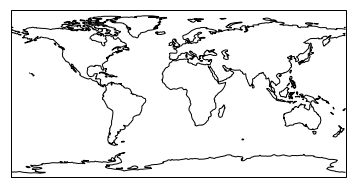

In [3]:
mp = plt.axes(projection=ccrs.PlateCarree())
mp.coastlines()


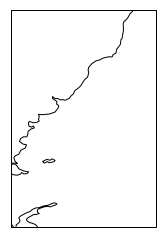

In [18]:
mp = plt.axes(projection=ccrs.PlateCarree())
mp.set_extent([-70, -30, -70, -10], ccrs.PlateCarree()) #this sets the dimensions of your map (west-east-norht-south extent)
mp.coastlines()


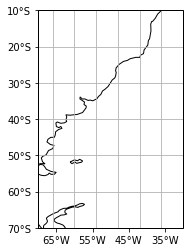

In [4]:
mp = plt.axes(projection=ccrs.PlateCarree())

mp.set_xticks([-65, -55, -45, -35], crs=ccrs.PlateCarree())
mp.set_yticks([-70, -60, -50, -40, -30, -20, -10], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter() #zero_direction_label=True)
lat_formatter = LatitudeFormatter()
mp.xaxis.set_major_formatter(lon_formatter)
mp.yaxis.set_major_formatter(lat_formatter)
mp.set_extent([-70, -30, -70, -10], ccrs.PlateCarree()) #this sets the dimensions of your map (west-east-norht-south extent)
mp.gridlines()

mp.coastlines()


/home/students/4082842/miniconda2/lib/python2.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


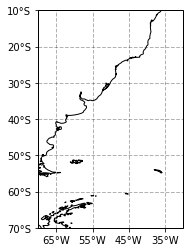

In [14]:
mp = plt.axes(projection=ccrs.PlateCarree())

mp.set_xticks([-65, -55, -45, -35], crs=ccrs.PlateCarree())
mp.set_yticks([-70, -60, -50, -40, -30, -20, -10], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter() #zero_direction_label=True)
lat_formatter = LatitudeFormatter()
mp.xaxis.set_major_formatter(lon_formatter)
mp.yaxis.set_major_formatter(lat_formatter)
mp.grid(linewidth=1, color='black', alpha=0.3, linestyle='--')

mp.set_extent([-70, -30, -70, -10], ccrs.PlateCarree()) #this sets the dimensions of your map (west-east-norht-south extent)
mp.coastlines()


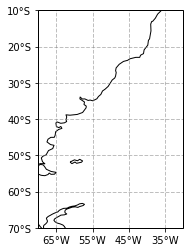

In [8]:
import matplotlib.ticker as mticker

mp = plt.axes(projection=ccrs.PlateCarree())
mp.set_xticks([-65, -55, -45, -35], crs=ccrs.PlateCarree())
mp.set_yticks([-70, -60, -50, -40, -30, -20, -10], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter() #zero_direction_label=True)
lat_formatter = LatitudeFormatter()
mp.xaxis.set_major_formatter(lon_formatter)
mp.yaxis.set_major_formatter(lat_formatter)

gl = mp.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([-70,-65,-55, -45, -35, -30])

# IF WE DO: 
# mp.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
#                   linewidth=1, color='gray', alpha=0.5, linestyle='--')
# mp.xlocator = mticker.FixedLocator([-70,-65,-55, -45, -35, -30])
# --> We get the wrong girdlines

mp.set_extent([-70, -30, -70, -10], ccrs.PlateCarree()) #this sets the dimensions of your map (west-east-norht-south extent)
mp.coastlines()


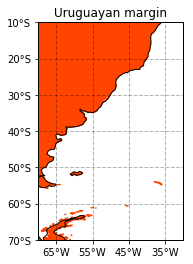

In [44]:
mp = plt.axes(projection=ccrs.PlateCarree())
mp.set_xticks([-65, -55, -45, -35], crs=ccrs.PlateCarree())
mp.set_yticks([-70, -60, -50, -40, -30, -20, -10], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter() #zero_direction_label=True)
lat_formatter = LatitudeFormatter()
mp.xaxis.set_major_formatter(lon_formatter)
mp.yaxis.set_major_formatter(lat_formatter)
mp.grid(linewidth=1, color='black', alpha=0.3, linestyle='--')

mp.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='orangered'))
#mp.stock_img()

mp.set_extent([-70, -30, -70, -10], ccrs.PlateCarree()) #this sets the dimensions of your map (west-east-norht-south extent)
mp.coastlines()

NOW I want to plot particles in this map, using this map multiple times for different plots,
so I created a function...

In [11]:
def Uruguayan_margin():
    mp = plt.axes(projection=ccrs.PlateCarree())
    mp.set_xticks([-65, -55, -45, -35], crs=ccrs.PlateCarree())
    mp.set_yticks([-70, -60, -50, -40, -30, -20, -10], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    mp.xaxis.set_major_formatter(lon_formatter)
    mp.yaxis.set_major_formatter(lat_formatter)
    mp.grid(linewidth=1, color='black', alpha=0.3, linestyle='--')
    mp.set_extent([-60, -30, -70, -10], ccrs.PlateCarree()) #this sets the dimensions of your map (west-east-norht-south extent)
    mp.coastlines()
    mp.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='orangered'))


Importing nc-file and importing functions used to investigate the PARCELS .nc files of particle trajectories

Text(0.5,1,'Uruguayan margin\nAverage dwelling temperatures\n')

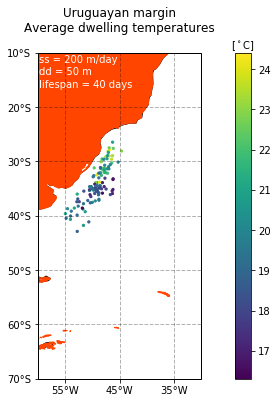

In [22]:
file_d18O = '/home/students/4082842/projects/Master_thesis/results/Sal_to_d18Otest7_dd50_sp200_lon[-52.41]_lat[-36.23]_depth[2535]_nr1.nc'

from functions_for_traj import load_particles_file, find_dwell, find_final, chanceT, value_ranges, temp_grouping
T = load_particles_file(file_d18O,['time','lon', 'lat', 'age', 'temp', 'z', 'd18oc', 'd18ow', 'loctemp'])
DwellTemp_arr, AvTemp_arr, Stdev_arr, obsmax, trajmax, = find_dwell(T.temp, T.z)
Final_temp, FinalLon, FinalLat = find_final(trajmax, DwellTemp_arr, T.lon, T.lat)

name = str('Average dwelling temperatures')
fig = plt.figure(figsize= (12,6))
Uruguayan_margin()
plt.scatter(FinalLon[:], FinalLat[:], c=AvTemp_arr[:], s=5) #c=AvTemp[:] c=FinalTemp[:]
plt.set_cmap('viridis')
cbar = plt.colorbar()
cbar.ax.xaxis.set_label_position('top')
cbar.ax.set_xlabel('[$^\circ$C]')
plt.text(-59.8, -10.3, 'ss = 200 m/day',verticalalignment='top', horizontalalignment='left',
        color='white', fontsize=10)
plt.text(-59.8, -12.5, 'dd = 50 m',verticalalignment='top', horizontalalignment='left',
        color='white', fontsize=10)
plt.text(-59.8, -15, 'lifespan = 40 days',verticalalignment='top', horizontalalignment='left',
        color='white', fontsize=10)
plt.title('Uruguayan margin' +'\n'+ name + '\n' )


Comments on this plot? Ideas? 

Text(0.5,1,'average d18O water, NOAA')

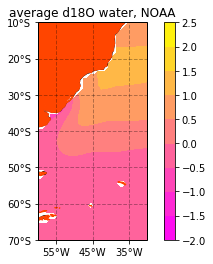

In [13]:
file = '/home/students/4082842/projects/Master_thesis/calculated_d18O_v1_1.nc'

nc= Dataset(file)

d18Ow = nc.variables["d18o"][:,:,:]
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]
depth = nc.variables['depth'][:]


fig = plt.figure()
Uruguayan_margin()
levels	 = np.arange(-2, 3, 0.5)
plt.contourf(lon, lat, d18Ow[1,:,:], levels, cmap = 'spring', transform=ccrs.PlateCarree())	
cbar = plt.colorbar()
plt.title('average d18O water, NOAA')